# Exploratory Data Analysis

## English language Wikipedia, Stub Analysis 

This notebook is used for exploratory data analysis of stub vs. full English language Wikipedia article ("non-stub") content for the purposes of defining text corpus inclusion and exclusion criteria.

The study was conducted on 1000 random English language Wikipedia articles on 5/22/2021.  The data are stored in JSON files in the `data.tar.xz` archive and must be unpacked before replicating this analysis.



In [1]:
import json
from pathlib import Path
import re

from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import bigrams
import numpy as np
from scipy import stats

jsondir = Path("data")
json_list = jsondir.glob("*.json")

REF_RE = re.compile(r"\[\d{1,3}\]")


def utf8len(s):
    return len(s.encode('utf-8'))


def clean(text):
    # remove "[edit]" strings that are used for content editing
    cleaned_content = text.replace("[edit]", "")
    # remove "[\d]" style reference strings
    cleaned_content = re.sub(REF_RE, "", cleaned_content)
    # remove "[citation neeeded]" editorial strings
    cleaned_content = cleaned_content.replace("[citation needed]", "")

    return cleaned_content



corpus = []

stubs = 0
total = 0

stub_sizes = []
nonstub_sizes = []

stub_tokens = []
stub_sentences = []

nonstub_tokens = []
nonstub_sentences = []

for json_file in json_list:
    content_list = []
    is_a_stub = False
    with open(json_file, "r") as f:
        json_obj = json.loads(f.read())
        html_text = json_obj["parse"]["text"]
        soup = BeautifulSoup(html_text, "lxml")
        # get text
        contents = soup.find_all("p")
        for content in contents:
            cleaned_content = clean(content.text)
            content_list.append(cleaned_content)
            
            if "is a stub" in cleaned_content:
                is_a_stub = True

    full_str = "\n".join(content_list)
    if is_a_stub:
        stubs += 1
        stub_sizes.append(utf8len(full_str))
        stub_tokens.append(len(word_tokenize(full_str)))
        stub_sentences.append(len(sent_tokenize(full_str)))
    else:
        nonstub_sizes.append(utf8len(full_str))
        nonstub_tokens.append(len(word_tokenize(full_str)))
        nonstub_sentences.append(len(sent_tokenize(full_str)))

    total += 1

assert len(stub_sizes) == stubs
assert len(nonstub_sizes) == total - stubs
print(f"Stubs: {stubs} {(stubs/total)*100}%")

        

Stubs: 362 36.199999999999996%


[781, 505, 1781, 655, 1227, 562, 204, 388, 648, 322, 408, 924, 291, 421, 239, 158, 331, 325, 532, 208, 887, 725, 605, 1435, 320, 273, 281, 2960, 192, 203, 1191, 480, 429, 286, 1014, 541, 1371, 346, 338, 888, 602, 204, 611, 1492, 340, 415, 1055, 195, 631, 544, 878, 429, 320, 241, 310, 155, 2247, 404, 933, 798, 220, 1557, 182, 721, 163, 407, 871, 436, 1325, 1344, 513, 1648, 333, 204, 223, 272, 923, 168, 529, 1468, 717, 648, 199, 1488, 1410, 844, 277, 260, 251, 1537, 325, 1078, 915, 1137, 268, 392, 347, 388, 167, 325, 822, 520, 466, 260, 589, 976, 972, 277, 474, 1359, 1803, 287, 882, 1864, 636, 2038, 547, 1030, 525, 456, 652, 382, 262, 218, 179, 325, 892, 977, 177, 377, 2036, 872, 997, 550, 394, 340, 933, 687, 2125, 273, 345, 319, 548, 508, 268, 1011, 241, 255, 814, 288, 499, 988, 485, 488, 349, 346, 274, 244, 688, 365, 1278, 385, 348, 675, 197, 288, 953, 398, 270, 906, 429, 348, 1251, 505, 2137, 321, 1307, 1068, 1111, 190, 352, 492, 976, 315, 656, 452, 416, 2167, 190, 646, 312, 189, 310,

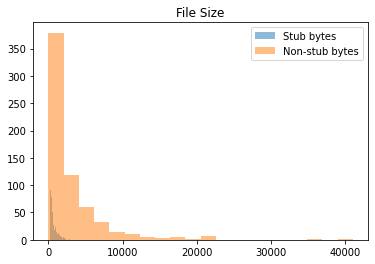

Stub median size: 452.00 IQR: 598.25 bytes
Non-stub median size: 1541.00 IQR: 3036.25 bytes
File size Mann-Whitney U test: U=63645.00000; p=0.00000




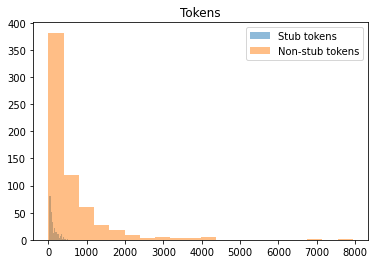


Stub median token number: 85.0 IQR: 112.5
Non-stub median token number: 285.0 IQR: 588.5
Token number Mann-Whitney U test: U=63877.50000; p=0.00000




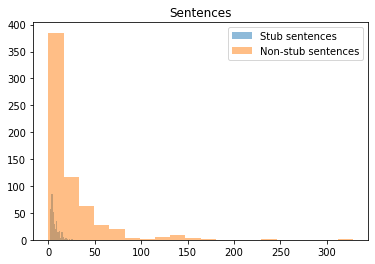


Stub median sentence number: 5.00 IQR: 5.00
Non-stub median sentence number: 12.50 IQR: 23.75
Sentence number Mann-Whitney U test: U=74034.50000; p=0.00000




In [2]:

print(stub_sizes)
print(nonstub_sizes)

print("")
plt.hist(stub_sizes, label='Stub bytes', alpha=0.5, bins=20)
plt.hist(nonstub_sizes, label='Non-stub bytes', alpha=0.5, bins=20)
plt.legend(loc='upper right')
plt.title('File Size')
plt.show()
print(f"Stub median size: {np.median(stub_sizes):.2f} IQR: {stats.iqr(stub_sizes):.2f} bytes")
print(f"Non-stub median size: {np.median(nonstub_sizes):.2f} IQR: {stats.iqr(nonstub_sizes):.2f} bytes")
size_u, size_p = stats.mannwhitneyu(stub_sizes, nonstub_sizes, use_continuity=True, alternative="two-sided")
print(f"File size Mann-Whitney U test: U={size_u:.5f}; p={size_p:.5f}\n\n")


plt.hist(stub_tokens, label='Stub tokens', alpha=0.5, bins=20)
plt.hist(nonstub_tokens, label='Non-stub tokens', alpha=0.5, bins=20)
plt.legend(loc='upper right')
plt.title('Tokens')
plt.show()
print(f"\nStub median token number: {np.median(stub_tokens)} IQR: {stats.iqr(stub_tokens)}")
print(f"Non-stub median token number: {np.median(nonstub_tokens)} IQR: {stats.iqr(nonstub_tokens)}")
token_u, token_p = stats.mannwhitneyu(stub_tokens, nonstub_tokens, use_continuity=True, alternative="two-sided")
print(f"Token number Mann-Whitney U test: U={token_u:.5f}; p={token_p:.5f}\n\n")


plt.hist(stub_sentences, label='Stub sentences', alpha=0.5, bins=20)
plt.hist(nonstub_sentences, label='Non-stub sentences', alpha=0.5, bins=20)
plt.legend(loc='upper right')
plt.title('Sentences')
plt.show()
print(f"\nStub median sentence number: {np.median(stub_sentences):.2f} IQR: {stats.iqr(stub_sentences):.2f}")
print(f"Non-stub median sentence number: {np.median(nonstub_sentences):.2f} IQR: {stats.iqr(nonstub_sentences):.2f}")
sent_u, sent_p = stats.mannwhitneyu(stub_sentences, nonstub_sentences, use_continuity=True, alternative="two-sided")
print(f"Sentence number Mann-Whitney U test: U={sent_u:.5f}; p={sent_p:.5f}\n\n")
